In [1]:
from LIMxCMBL.init import *
from LIMxCMBL.experiments import *

import matplotlib.pyplot as plt
from matplotlib import colors


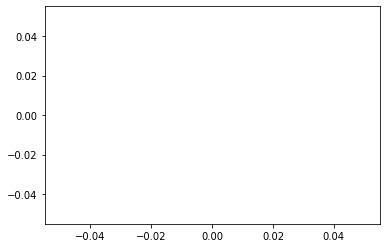

In [2]:
plt.plot()
plt.rcParams.update({
    "text.usetex": True,
    "font.size": "11",
    "font.family" : "serif",
    'figure.constrained_layout.use':True,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'hatch.linewidth':0.1
})

e_order = ['CHIME',
          'HETDEX',
          'COMAP',
           'CCAT-prime',
           'SPHEREx',
]

In [3]:
plt_left = plt.rcParams['figure.subplot.left']
plt_right = plt.rcParams['figure.subplot.right']
plt_cntr = (plt_left + plt_right) / 2

In [4]:
#preload I_I and IHiIHi
dict_II = {}
dict_IHiIHi = {}
dict_IHiIHi_aux = {}

for e_idx, e in enumerate(e_order):
    n_bins = 100
    if(e == 'SPHEREx'):
        n_bins = 15
    print(e_idx, e)
    zmin = experiments[e]['zmin']
    zmax = experiments[e]['zmax']
    line_str = experiments[e]['line_str']
    
    Omega_field  =  np.array(experiments[e]['Omega_field'].to(u.rad**2)) #rad^2
    chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
    chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))

    chi_bin_edges = np.linspace(chimin*(1+1e-8), chimax*(1 - 1e-8), n_bins + 1)
    chi_bin_centers = (chi_bin_edges[1:] + chi_bin_edges[:-1])/2
    dchi_binned = np.mean(np.diff(chi_bin_edges))
    
    
    def get_binned(base, n_external = 300):
        external_chis = np.linspace(chimin*(1+1e-8), chimax*(1 - 1e-8), n_external)

        oup = np.zeros((100, n_bins, n_bins), dtype=np.float64)
        for i, (l1, r1) in enumerate(zip(chi_bin_edges, chi_bin_edges[1:])):
            for j, (l2, r2) in enumerate(zip(chi_bin_edges, chi_bin_edges[1:])):
                idx1 = np.where((external_chis > l1) & (external_chis <= r1))[0]
                idx2 = np.where((external_chis > l2) & (external_chis <= r2))[0]
                oup[:,i,j] = (np.sum(base[:,
                                          idx1[0]:idx1[-1]+1,
                                          idx2[0]:idx2[-1]+1], 
                                     axis=(1, 2)) / len(idx1) / len(idx2))
        return oup

    #get <II>

    I_I_unbinned = np.load('/scratch/users/delon/LIMxCMBL/I_auto/'+
                              'I_auto_n_ext_%d_zmin_%.1f_zmax_%.1f.npy'%(3000, 
                                                                         zmin, 
                                                                         zmax))

    I_I = get_binned(I_I_unbinned, n_external = 3000)
    dict_II[e] = I_I
    
    
    IHiIHi_oup_fname = '/oak/stanford/orgs/kipac/users/delon/LIMxCMBL/LIM_auto/'
    IHiIHi_oup_fname += '%s_zmin_%.1f_zmax_%.1f_Lambda_idx_%d_n_b_%d_jax_qmc.npy'%(line_str,
                                                                                   zmin, zmax, 
                                                                                   24, 
                                                                                   n_bins)

    IHiIHi = np.load(IHiIHi_oup_fname)

    for ell_idx in range(len(ells)):
        #Cheng and Higham, 1998
        eigenvalues, eigenvectors = np.linalg.eig(IHiIHi[ell_idx])
        patched_eigenvalues = np.where(eigenvalues <0, 0.0, eigenvalues)
        IHiIHi[ell_idx] = eigenvectors @ np.diag(patched_eigenvalues) @ eigenvectors.T
    dict_IHiIHi[e] = IHiIHi
    
    
    
    #smaller lambda
    IHiIHi_oup_fname = '/oak/stanford/orgs/kipac/users/delon/LIMxCMBL/LIM_auto/'
    IHiIHi_oup_fname += '%s_zmin_%.1f_zmax_%.1f_Lambda_idx_%d_n_b_%d_jax_qmc.npy'%(line_str,
                                                                                   zmin, zmax, 
                                                                                   18, 
                                                                                   n_bins)
    print(Lambdas[18])
    IHiIHi_aux = np.load(IHiIHi_oup_fname)

    for ell_idx in range(len(ells)):
        #Cheng and Higham, 1998
        eigenvalues, eigenvectors = np.linalg.eig(IHiIHi_aux[ell_idx])
        patched_eigenvalues = np.where(eigenvalues <0, 0.0, eigenvalues)
        IHiIHi_aux[ell_idx] = eigenvectors @ np.diag(patched_eigenvalues) @ eigenvectors.T
    dict_IHiIHi_aux[e] = IHiIHi_aux

0 CHIME
0.01
1 HETDEX
0.01
2 COMAP
0.01
3 CCAT-prime
0.01
4 SPHEREx
0.01


In [5]:
ell_idxs = [0, 37, 62, 73, 99]
titles = [10, 100, 500, 1000, 5000]


In [17]:
e_colors = {
    'CHIME': '#8932B8',
    'HETDEX': '#3C44AA',
    'COMAP': '#5E7C16',
    'SPHEREx': '#B02E26',
    'CCAT-prime':'#F9801D',
}


/tmp/ipykernel_118900/2692652158.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad = 0.0)


0 CHIME
1 HETDEX
2 COMAP
3 CCAT-prime
4 SPHEREx


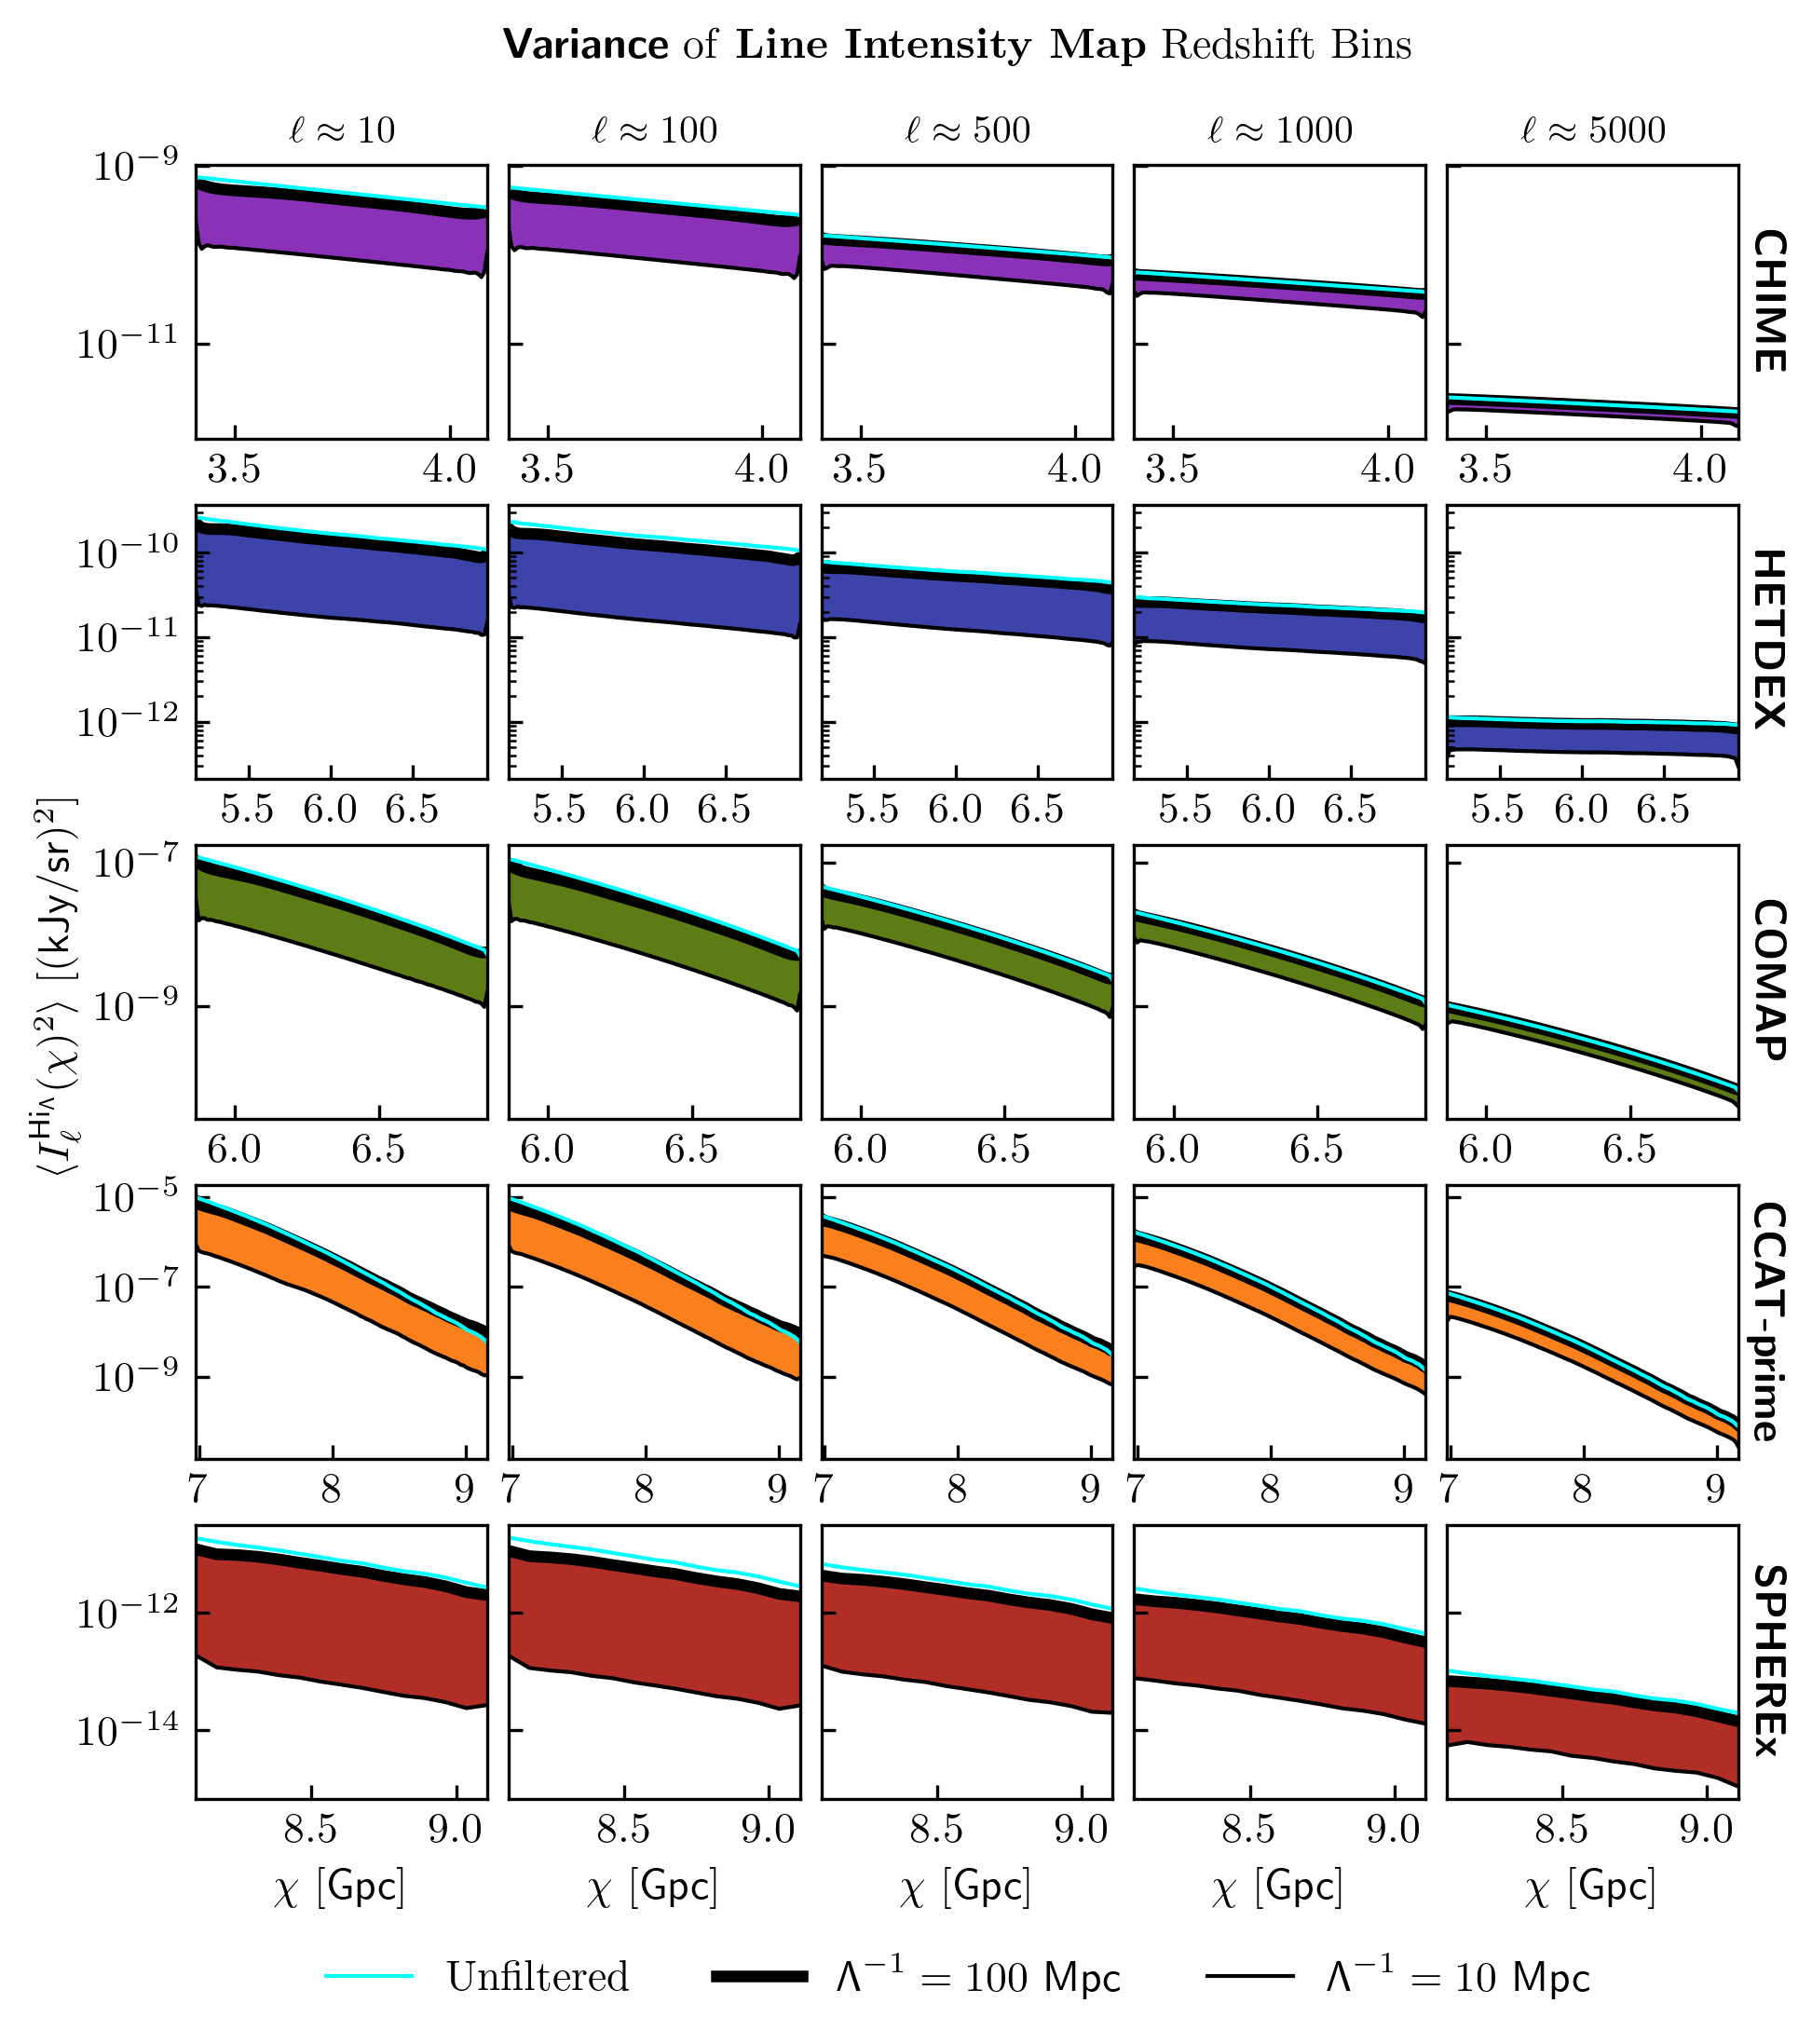

In [18]:
fig, _axs = plt.subplots(nrows=5, ncols=5, 
                             figsize = (5.8, 3.65/3*5), facecolor = 'none', dpi = 300,
                        sharey='row')
plt.tight_layout(pad = 0.0)



for e_idx, e in enumerate(e_order):
    n_bins = 100
    if(e == 'SPHEREx'):
        n_bins = 15
    print(e_idx, e)
    zmin = experiments[e]['zmin']
    zmax = experiments[e]['zmax']
    line_str = experiments[e]['line_str']
    
    Omega_field  =  np.array(experiments[e]['Omega_field'].to(u.rad**2)) #rad^2
    chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
    chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))

    chi_bin_edges = np.linspace(chimin*(1+1e-8), chimax*(1 - 1e-8), n_bins + 1)
    chi_bin_centers = (chi_bin_edges[1:] + chi_bin_edges[:-1])/2
    dchi_binned = np.mean(np.diff(chi_bin_edges))

    
    axs = _axs[e_idx]
    c = e_colors[e]
    
    zmin = experiments[e]['zmin']
    zmax = experiments[e]['zmax']
    line_str = experiments[e]['line_str']
    
    Omega_field  =  np.array(experiments[e]['Omega_field'].to(u.rad**2)) #rad^2
    chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
    chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))

#     extent = np.array([chimin, chimax,
#                        chimin, chimax])
#     extent /= 1000 # Mpc -> Gpc
    
    extent = [0,1,0,1]
    
    I_I = dict_II[e]    
    IHiIHi = dict_IHiIHi[e]
    IHiIHi_aux = dict_IHiIHi_aux[e]

    I_I_var = [np.diag(I_I[ell_idx]) for ell_idx in range(len(ells))]
    IHiIHi_var = [np.diag(IHiIHi[ell_idx]) for ell_idx in range(len(ells))]
    IHiIHi_aux_var = [np.diag(IHiIHi_aux[ell_idx]) for ell_idx in range(len(ells))]
    
    
    vb = np.max(np.abs(I_I_var))
    
    lin_factor = 1
    log10vb = np.log10(vb)
    linthresh = 10**(np.floor(log10vb)-1)
    vminmax = 10**(log10vb)
    
    norm = colors.SymLogNorm(linthresh=linthresh, 
                             linscale=lin_factor,
                             vmin=-vminmax, 
                             vmax=vminmax, 
                             base=10)
        
    chi_bin_edges = np.linspace(chimin*(1+1e-8), chimax*(1 - 1e-8), n_bins + 1)
    chi_bin_centers = (chi_bin_edges[1:] + chi_bin_edges[:-1])/2
    dchi_binned = np.mean(np.diff(chi_bin_edges))
    
    
    for i,ell_idx in enumerate(ell_idxs):

        axs[i].plot(chi_bin_centers/1000,
                    IHiIHi_aux_var[ell_idx], c='k', lw=3, ls='-')

        axs[i].plot(chi_bin_centers/1000,
                    IHiIHi_var[ell_idx], c='k', lw=1, ls='-')
        
        axs[i].plot(chi_bin_centers/1000,
                    I_I_var[ell_idx], c='cyan', lw=1, ls='-')

        axs[i].fill_between(chi_bin_centers/1000,
                    IHiIHi_var[ell_idx], IHiIHi_aux_var[ell_idx], color=c, lw=0)
        
        axs[i].set_xlim(min(chi_bin_centers)/1000, max(chi_bin_centers)/1000)
        axs[i].set_yscale('log')
        if(e_idx == 0):
            axs[i].set_title(r'$\ell \approx %d$'%(titles[i]), fontsize=10)
        if(e_idx == 4):
            axs[i].set_xlabel('$\chi$ [{\sf Gpc}]')
    axs[-1].text(1.03, 0.5, r'\textsf{\textbf{%s}}'%(e),
                             transform=axs[-1].transAxes, 
                             ha='left', va='center',
                             rotation=-90)
    
    
    
_axs[2,0].set_ylabel(r'$\langle I^{\sf Hi_\Lambda}_\ell(\chi)^2\rangle$ [$({\sf kJy/sr})^2$]')
 
    
fig.text(plt_cntr, 1.05, r"\textsf{\textbf{Variance}} of \textbf{Line Intensity Map} Redshift Bins",
         ha='center', 
         va='bottom', 
        fontsize=11)


from matplotlib.lines import Line2D
from matplotlib.patches import Patch

legend_elements = [
    Line2D([0], [0], color='cyan', lw=1, ls='-', label='Unfiltered'),
    Line2D([0], [0], color='k', lw=3, label=r'${\sf \Lambda}^{-1}=100\ {\sf Mpc}$'),
    Line2D([0], [0], color='k', lw=1, label=r'${\sf \Lambda}^{-1}=10\ {\sf Mpc}$'),
]

fig.legend(handles=legend_elements, 
           loc='lower center',
           bbox_to_anchor=(plt_cntr, -0.11),
           frameon=False,
           ncol=3)


fig.savefig('figures/013.003.pdf', bbox_inches='tight')